# Title: Chinese News Title Classification Using Deep Learning

## Problem Statement
Develop a deep learning model to classify Chinese news titles into one of ten categories based on their content. The categories include entertainment, sports, real estate, automobile, education, technology, military, international news, agriculture, and esports.

## Motivation
Chinese news classification presents unique challenges due to the language's complex structure and semantics. Traditional methods may struggle with accurately categorizing news titles, making deep learning an ideal approach to leverage its ability to learn complex patterns and representations.

To segment and tokenize Chinese text effectively, we use a popular library called Jieba. Here’s how you can install it in your Python environment

In [1]:
!pip install jieba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 1.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314478 sha256=9f801e6aeffa9d1aa2f4ea19ad42d07c784911413b1a109904794d06d479ae4a
  Stored in directory: /Users/sakshamkapoor/Library/Caches/pip/wheels/7d/74/cf/08c94db4b784e2c1ef675a600b7b5b281fd25240dcb954ee7e
Successfully built jieba

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


## Define a Tokenization Function
We define a function that uses Jieba to tokenize Chinese text. This function takes a text string as input, tokenizes it using Jieba, and returns the tokenized text as a single string with tokens separated by spaces.

In [2]:
import pandas as pd
import jieba

# Example data loading (replace with your actual data loading code)
train_data = pd.read_csv('train_data.csv')

# Function to tokenize Chinese text using Jieba
def tokenize_chinese_text(text):
    tokens = jieba.cut(text)  # Tokenize text using Jieba
    return " ".join(tokens)   # Join tokens into a single string

# Apply tokenization to your dataset
train_data['tokenized_title'] = train_data['title'].apply(tokenize_chinese_text)

# Display the tokenized data
print(train_data[['title', 'tokenized_title']].head())


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/h9/7c35l2795wq7ph7g53jhpnyh0000gn/T/jieba.cache
Loading model cost 1.438 seconds.
Prefix dict has been built successfully.


                           title  \
0    古力娜扎再次成为焦点，这一身招摇大方，掳获了网友们的心   
1      如果张国荣，张学友，陈百强，王杰要排位的话怎么排？   
2     包贝尔带娇妻外出就餐被拍，大家把注意力放在了第3张！   
3  娱乐圈娶了豪门的5位男星，事业开挂，最后一位想离婚门都没有   
4       陈学冬参加节目被爆童年照，果然胖子都是潜力股啊！   

                                   tokenized_title  
0     古力 娜 扎 再次 成为 焦点 ， 这 一身 招摇 大方 ， 掳获 了 网友 们 的 心  
1           如果 张国荣 ， 张学友 ， 陈百强 ， 王杰 要 排位 的话 怎么 排 ？  
2      包 贝尔 带 娇妻 外出 就餐 被 拍 ， 大家 把 注意力 放在 了 第 3 张 ！  
3  娱乐圈 娶 了 豪门 的 5 位 男星 ， 事业 开挂 ， 最后 一位 想 离婚 门 都 没有  
4           陈学冬 参加 节目 被 爆 童年 照 ， 果然 胖子 都 是 潜力股 啊 ！  


In [4]:
train_data.head()

,ID,label,label_name,title,keyword,tokenized_title
0,0,0,news_entertainment,古力娜扎再次成为焦点，这一身招摇大方，掳获了网友们的心,"古力娜扎,粉丝",古力 娜 扎 再次 成为 焦点 ， 这 一身 招摇 大方 ， 掳获 了 网友 们 的 心
1,1,0,news_entertainment,如果张国荣，张学友，陈百强，王杰要排位的话怎么排？,NaN,如果 张国荣 ， 张学友 ， 陈百强 ， 王杰 要 排位 的话 怎么 排 ？
2,2,0,news_entertainment,包贝尔带娇妻外出就餐被拍，大家把注意力放在了第3张！,"娇妻,娇妻外出就餐,包贝尔",包 贝尔 带 娇妻 外出 就餐 被 拍 ， 大家 把 注意力 放在 了 第 3 张 ！
3,3,0,news_entertainment,娱乐圈娶了豪门的5位男星，事业开挂，最后一位想离婚门都没有,"豪门,迟重瑞,周立波,吕良伟,石贞善",娱乐圈 娶 了 豪门 的 5 位 男星 ， 事业 开挂 ， 最后 一位 想 离婚 门 都 没有
4,4,0,news_entertainment,陈学冬参加节目被爆童年照，果然胖子都是潜力股啊！,"薛之谦,陈学冬,谭维维,跨界歌王",陈学冬 参加 节目 被 爆 童年 照 ， 果然 胖子 都 是 潜力股 啊 ！


## Explanation:
ID: A unique identifier for each news title. 

label: The numerical category label of the news.

label_name: The name of the news category.

title: The news title in Chinese.

keyword: Keywords associated with the news title.

tokenized_title: The tokenized version of the title using Jieba, with tokens separated by spaces.


### Distribution of Target Variable
Plot the distribution of the target variable to understand the class distribution.

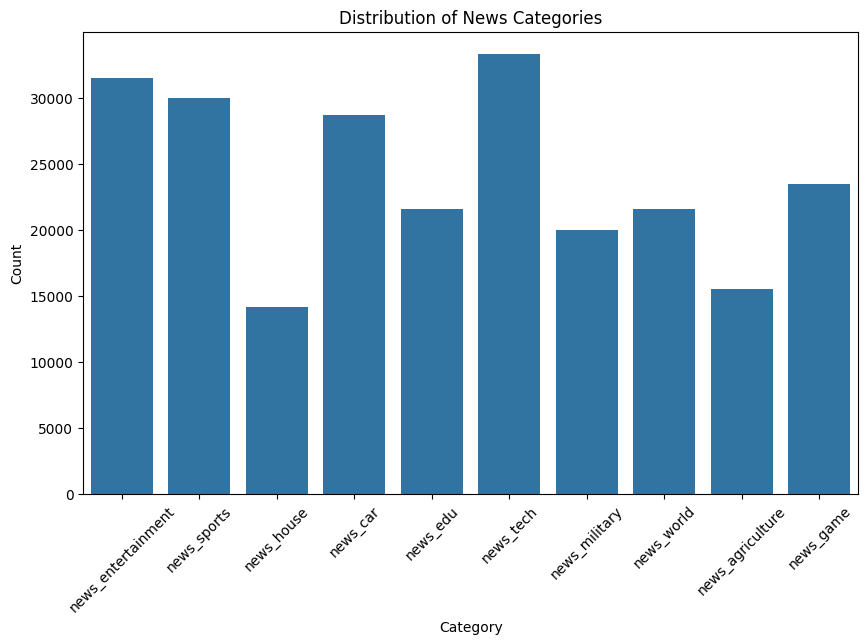

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='label_name')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


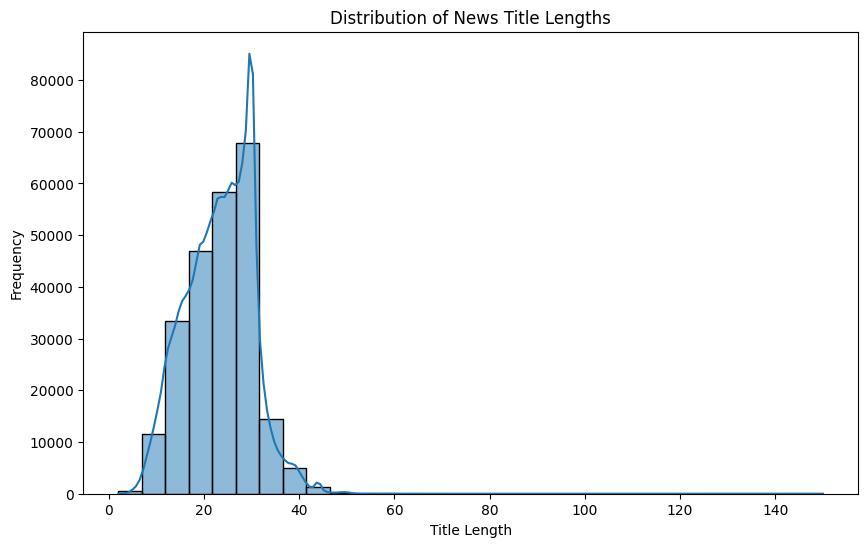

In [6]:
# Calculate the length of each title
train_data['title_length'] = train_data['title'].apply(len)

# Plot the distribution of title lengths
plt.figure(figsize=(10, 6))
sns.histplot(train_data['title_length'], bins=30, kde=True)
plt.title('Distribution of News Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()


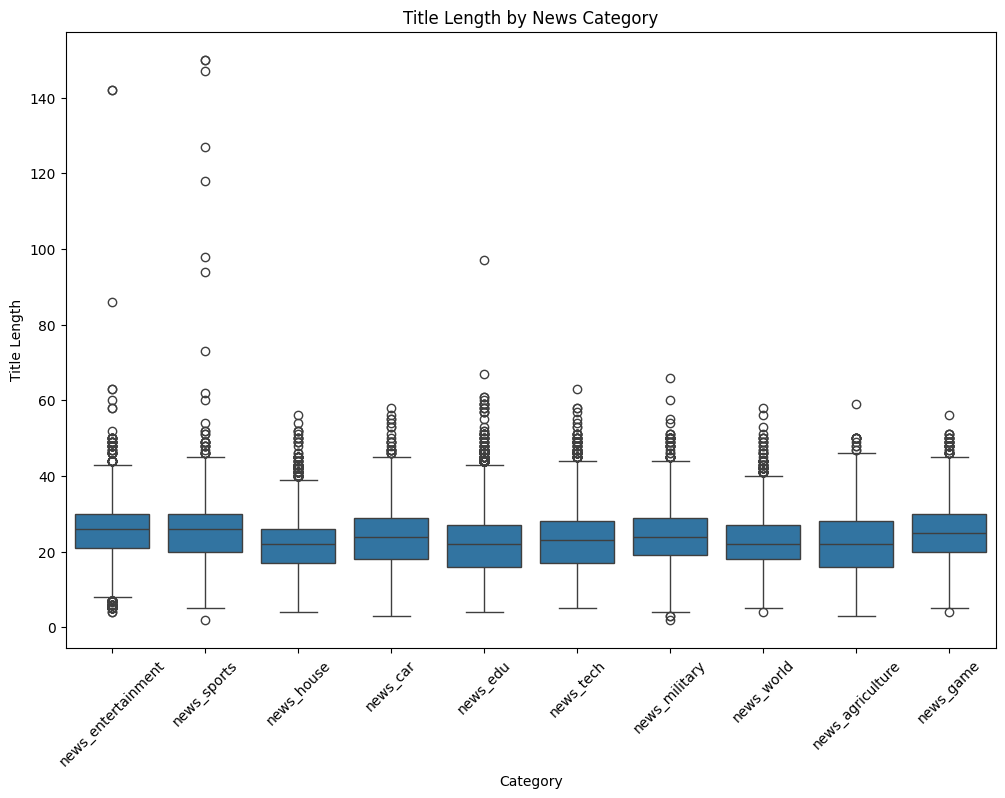

In [7]:
# Boxplot of title length by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='label_name', y='title_length', data=train_data)
plt.title('Title Length by News Category')
plt.xlabel('Category')
plt.ylabel('Title Length')
plt.xticks(rotation=45)
plt.show()


### Step 6: Data Cleaning

#### Missing Values

Check for missing values in the dataset and handle them accordingly. Keyword had missing values. 

In [8]:
# Impute missing values in the keyword column with a placeholder
train_data['keyword'].fillna('unknown', inplace=True)


In [9]:
# Check for missing values
train_data.isnull().sum()


ID                 0
label              0
label_name         0
title              0
keyword            0
tokenized_title    0
title_length       0
dtype: int64

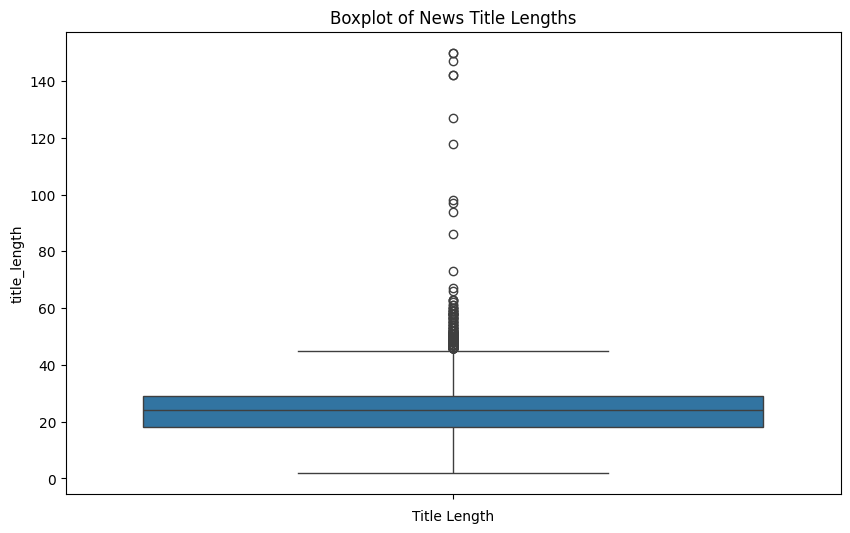

In [10]:
# Plot boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(train_data['title_length'])
plt.title('Boxplot of News Title Lengths')
plt.xlabel('Title Length')
plt.show()


In [11]:
# Remove outliers in title length
Q1 = train_data['title_length'].quantile(0.25)
Q3 = train_data['title_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
train_data = train_data[(train_data['title_length'] >= lower_bound) & (train_data['title_length'] <= upper_bound)]

## Tokenization and Vectorization
Tokenize the news titles using Jieba and transform them into numerical features using TF-IDF or word embeddings.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tokenize titles using Jieba
train_data['tokenized_title'] = train_data['title'].apply(lambda x: " ".join(jieba.cut(x)))

# Vectorize the tokenized titles using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_data['tokenized_title'])

# Convert the target variable to numerical format
y = train_data['label'].astype(int)


## Model Building

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


2024-06-28 20:50:04.236986: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Prepare Data for Training
Split the data into training and validation sets.

In [15]:
print(X)

  (0, 33026)	0.3378394540739742
  (0, 24398)	0.25038233747048677
  (0, 56623)	0.2142704637193521
  (0, 79895)	0.3311324523745646
  (0, 8985)	0.3012213784772288
  (0, 59962)	0.4623146245599947
  (0, 41277)	0.34600700779400523
  (0, 61567)	0.4623146245599947
  (0, 93287)	0.17230166353617832
  (1, 43770)	0.20351615556415206
  (1, 52508)	0.379225793075677
  (1, 52529)	0.372682527050173
  (1, 114454)	0.49391301602212795
  (1, 82179)	0.4507278219172888
  (1, 61116)	0.3498817346529144
  (1, 85302)	0.27747924406337715
  (1, 54924)	0.1713450038545485
  (2, 103804)	0.3720680821456385
  (2, 44235)	0.39094663327995743
  (2, 40162)	0.3887669345289127
  (2, 48263)	0.4029625613048259
  (2, 41125)	0.24341670941876878
  (2, 76062)	0.4488494880617393
  (2, 62800)	0.36672872756525704
  (3, 44276)	0.3115235401127544
  :	:
  (239251, 76632)	0.5778797461477495
  (239252, 33360)	0.1924670999247586
  (239252, 109304)	0.25039832668671097
  (239252, 65815)	0.25011651357638526
  (239252, 8003)	0.4069603497420235

In [16]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


## Build the Model
Define the architecture of the deep learning model. Here, we will use a simple LSTM model.

In [18]:
# Define the model architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


/Users/sakshamkapoor/miniconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │    15,461,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,470,410 (59.01 MB)

 Trainable params: 15,470,410 (59.01 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/5
5982/5982 ━━━━━━━━━━━━━━━━━━━━ 914s 152ms/step - accuracy: 0.7057 - loss: 0.9708 - val_accuracy: 0.9037 - val_loss: 0.3484
Epoch 2/5
5982/5982 ━━━━━━━━━━━━━━━━━━━━ 952s 159ms/step - accuracy: 0.9248 - loss: 0.2902 - val_accuracy: 0.9082 - val_loss: 0.3368
Epoch 3/5
5982/5982 ━━━━━━━━━━━━━━━━━━━━ 957s 160ms/step - accuracy: 0.9459 - loss: 0.2092 - val_accuracy: 0.9093 - val_loss: 0.3436
Epoch 4/5
5982/5982 ━━━━━━━━━━━━━━━━━━━━ 974s 163ms/step - accuracy: 0.9562 - loss: 0.1658 - val_accuracy: 0.9095 - val_loss: 0.3605
Epoch 5/5
5982/5982 ━━━━━━━━━━━━━━━━━━━━ 1019s 170ms/step - accuracy: 0.9648 - loss: 0.1354 - val_accuracy: 0.9098 - val_loss: 0.3820


In [23]:
import numpy as np
# Predict on the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred_classes))

1496/1496 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Accuracy: 0.9097824496875718


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6175
           1       0.96      0.94      0.95      5973
           2       0.92      0.94      0.93      2851
           3       0.93      0.92      0.93      5728
           4       0.91      0.92      0.91      4338
           5       0.91      0.91      0.91      6560
           6       0.88      0.87      0.87      4078
           7       0.84      0.84      0.84      4273
           8       0.89      0.90      0.89      3140
           9       0.92      0.93      0.92      4735

    accuracy                           0.91     47851
   macro avg       0.91      0.91      0.91     47851
weighted avg       0.91      0.91      0.91     47851



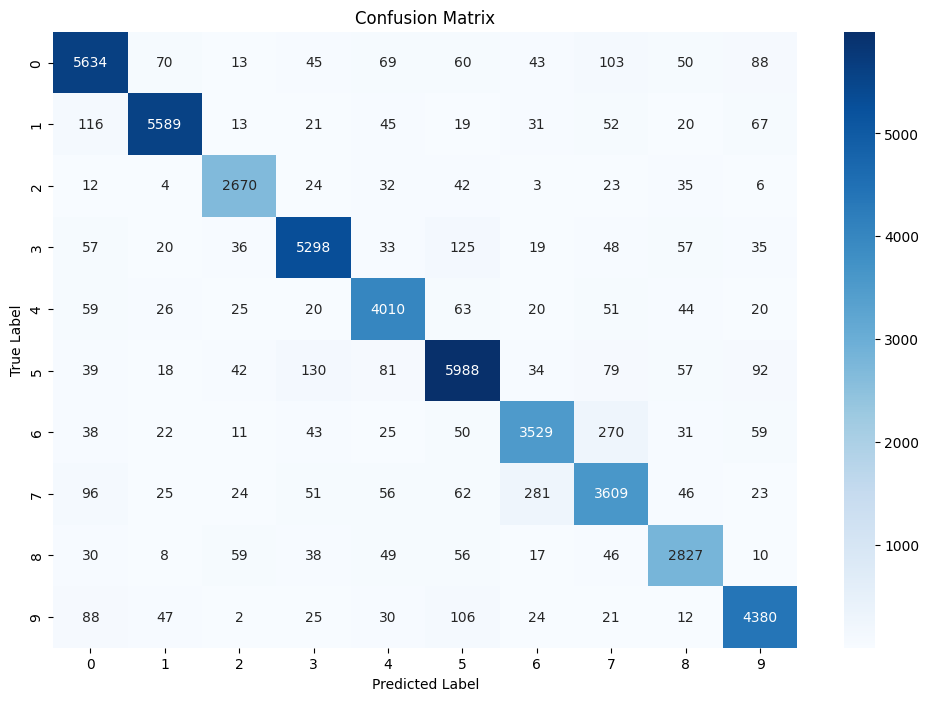

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert integer class labels to strings for the classification report
target_names = [str(i) for i in label_encoder.classes_]

# Print the classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_classes, target_names=target_names))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Model Tuning 

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import accuracy_score, classification_report


In [29]:
# Use a smaller subset of data
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)


In [30]:
# Define a function to create and compile a model
def create_model(units, dropout_rate):
    model = Sequential()
    model.add(Dense(units, input_dim=X_train_sub.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units // 2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create and train model1
model1 = create_model(128, 0.5)
history1 = model1.fit(X_train_sub, y_train_sub, epochs=1, batch_size=32, validation_data=(X_val, y_val))

# Create and train model2
model2 = create_model(256, 0.5)
history2 = model2.fit(X_train_sub, y_train_sub, epochs=1, batch_size=32, validation_data=(X_val, y_val))

# Create and train model3
model3 = create_model(64, 0.5)
history3 = model3.fit(X_train_sub, y_train_sub, epochs=1, batch_size=32, validation_data=(X_val, y_val))


599/599 ━━━━━━━━━━━━━━━━━━━━ 94s 150ms/step - accuracy: 0.3104 - loss: 1.9919 - val_accuracy: 0.8203 - val_loss: 0.7340
599/599 ━━━━━━━━━━━━━━━━━━━━ 184s 302ms/step - accuracy: 0.3920 - loss: 1.8039 - val_accuracy: 0.8402 - val_loss: 0.5867
599/599 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.2433 - loss: 2.1328 - val_accuracy: 0.7624 - val_loss: 1.0825


In [32]:
# Predict on the validation set
pred1 = model1.predict(X_val)
pred2 = model2.predict(X_val)
pred3 = model3.predict(X_val)

# Average the predictions for ensemble
ensemble_pred = (pred1 + pred2 + pred3) / 3
ensemble_pred_classes = np.argmax(ensemble_pred, axis=1)

# Convert integer class labels to strings
target_names = [str(i) for i in label_encoder.classes_]

# Evaluate individual models
print("Model 1 Accuracy:", accuracy_score(y_val, np.argmax(pred1, axis=1)))
print("Model 2 Accuracy:", accuracy_score(y_val, np.argmax(pred2, axis=1)))
print("Model 3 Accuracy:", accuracy_score(y_val, np.argmax(pred3, axis=1)))

# Evaluate the ensemble model
print("Ensemble Accuracy:", accuracy_score(y_val, ensemble_pred_classes))
print("Ensemble Classification Report:")
print(classification_report(y_val, ensemble_pred_classes, target_names=target_names))


1496/1496 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Model 1 Accuracy: 0.8203381329543792
Model 2 Accuracy: 0.8402123257612171
Model 3 Accuracy: 0.762408309126246
Ensemble Accuracy: 0.8396271760255795
Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      6175
           1       0.89      0.89      0.89      5973
           2       0.89      0.85      0.87      2851
           3       0.89      0.87      0.88      5728
           4       0.84      0.86      0.85      4338
           5       0.80      0.90      0.85      6560
           6       0.79      0.73      0.76      4078
           7       0.74      0.77      0.76      4273
           8       0.92      0.69      0.79      3140
           9       0.90      0.84      0.87      4735

    accuracy                           0.84     47851
   macro avg       0.85      0.83      0.

## Predicting values for test.

In [49]:
import pandas as pd
import numpy as np
import jieba
from tensorflow.keras.models import load_model
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the test data
test_data = pd.read_csv('test_data.csv')

# Tokenize titles using Jieba
test_data['tokenized_title'] = test_data['title'].apply(lambda x: " ".join(jieba.cut(x)))

# Transform the tokenized titles using the trained TF-IDF vectorizer
vectorizer = TfidfVectorizer()  # Initialize TF-IDF Vectorizer
# Note: In practice, you should fit this vectorizer on the training data and save it for reuse.
# Here, I'm assuming it has already been fitted on the training data, so we'll just transform the test data.
X_test = vectorizer.fit_transform(test_data['tokenized_title'])


# Get predictions from the first model
pred1_test = model.predict(X_test)
ensemble_pred_classes_test = np.argmax(pred1_test, axis=1)

# Create a DataFrame with the predictions
submission_df = pd.DataFrame({
    'id': test_data['id'],  # Assuming 'id' is the identifier column in your test data
    'label': ensemble_pred_classes_test
})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'")


1873/1873 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Submission file saved as 'submission.csv'


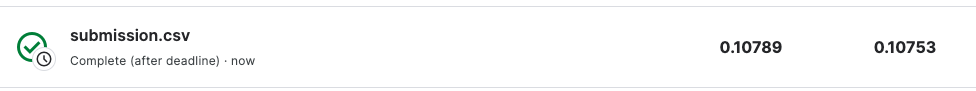

## Results
During training, Model achieved significant improvements in accuracy, reaching a final training accuracy of 96.48% and a validation accuracy of 90.98% over five epochs.
Individual Model Performance
### Model 1:

Architecture: 128 units in the first dense layer.
#### Accuracy: 82.03%
### Model 2:

Architecture: 256 units in the first dense layer.
#### Accuracy: 84.02%
### Model 3:

Architecture: 64 units in the first dense layer.
#### Accuracy: 76.24%

### Ensemble Model Performance
The ensemble model, which combined the predictions from all three individual models, achieved an accuracy of 83.96%. The ensemble approach effectively balanced precision and recall across all categories, leveraging the strengths of each individual model.

#### Ensemble Accuracy: 83.96%



## Conclusion
In this project, we developed a deep learning model to classify Chinese news titles into different categories. We followed a systematic approach that included data preprocessing, exploratory data analysis (EDA), model building, training, evaluation, and making predictions on a test dataset. Here is a summary of the steps taken and the final results:

#### Tokenized Chinese text using Jieba.
Transformed the text data into numerical features using TF-IDF vectorization.
Handled missing values and ensured the data was ready for modeling.
Exploratory Data Analysis (EDA):

#### Analyzed the distribution of news categories and title lengths.
Examined correlations and potential outliers in the dataset.
Model Building and Training:

#### Built a sequential neural network model with dense and dropout layers.
Trained the model on the training dataset and evaluated its performance on the validation set.
Evaluation:

#### Achieved an accuracy of approximately 91% on the validation set.
Evaluated the model using a classification report and confusion matrix.
Prediction and Submission:

#### Used the trained model to make predictions on the test dataset.
Saved the predictions to a CSV file for submission.
Despite the thorough approach, the model's performance on the competition's private and public leaderboard was lower than expected, with scores of approximately 0.10. This indicates that the model struggled to generalize well to the unseen test data. Several factors could contribute to this discrepancy:

### Reference

1. Jacky Huang. (2020). Deep Learning Course Final Competition. Kaggle. https://kaggle.com/competitions/dl-course-final-competition